<a href="https://colab.research.google.com/github/deepakgowtham/EVA4/blob/master/Week12/AssesmentB/EVA4_S12_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [0]:
df=pd.read_json('via_export_json.json')
df =df.transpose()

In [0]:
df.head()

,filename,size,regions,file_attributes
dog.0.jpg32053,dog.0.jpg,32053,"[{'shape_attributes': {'name': 'rect', 'x': 61...","{'caption': '', 'public_domain': 'no', 'image_..."
dog.1.jpg25034,dog.1.jpg,25034,"[{'shape_attributes': {'name': 'rect', 'x': 38...","{'caption': '', 'public_domain': 'no', 'image_..."
dog.2.jpg8490,dog.2.jpg,8490,"[{'shape_attributes': {'name': 'rect', 'x': 66...","{'caption': '', 'public_domain': 'no', 'image_..."
dog.3.jpg28457,dog.3.jpg,28457,"[{'shape_attributes': {'name': 'rect', 'x': 29...","{'caption': '', 'public_domain': 'no', 'image_..."
dog.4.jpg12992,dog.4.jpg,12992,"[{'shape_attributes': {'name': 'rect', 'x': 35...","{'caption': '', 'public_domain': 'no', 'image_..."


In [0]:
img_data=df.reset_index()[['filename', 'regions']]

In [0]:
img_data.head()

,filename,regions
0,dog.0.jpg,"[{'shape_attributes': {'name': 'rect', 'x': 61..."
1,dog.1.jpg,"[{'shape_attributes': {'name': 'rect', 'x': 38..."
2,dog.2.jpg,"[{'shape_attributes': {'name': 'rect', 'x': 66..."
3,dog.3.jpg,"[{'shape_attributes': {'name': 'rect', 'x': 29..."
4,dog.4.jpg,"[{'shape_attributes': {'name': 'rect', 'x': 35..."


In [0]:
img_data['regions'].head()

0    [{'shape_attributes': {'name': 'rect', 'x': 61...
1    [{'shape_attributes': {'name': 'rect', 'x': 38...
2    [{'shape_attributes': {'name': 'rect', 'x': 66...
3    [{'shape_attributes': {'name': 'rect', 'x': 29...
4    [{'shape_attributes': {'name': 'rect', 'x': 35...
Name: regions, dtype: object

In [0]:
data_list=[]
for row in range(img_data.shape[0]):
  data=img_data['regions'][row][0]['shape_attributes']
  data_list.append(data)

In [0]:
shape_df=pd.DataFrame(data_list)

In [0]:
shape_df.head()

,name,x,y,width,height
0,rect,61,10,322,303
1,rect,38,30,254,440
2,rect,66,30,95,151
3,rect,29,3,468,349
4,rect,35,11,242,270


In [0]:
annotate_data=pd.concat([img_data[['filename']], shape_df[['x',	'y','width','height']]],1)

In [0]:
annotate_data.head()

,filename,x,y,width,height
0,dog.0.jpg,61,10,322,303
1,dog.1.jpg,38,30,254,440
2,dog.2.jpg,66,30,95,151
3,dog.3.jpg,29,3,468,349
4,dog.4.jpg,35,11,242,270


In [0]:
annotate_data['norm_x']= annotate_data['x']/ annotate_data['width']
annotate_data['norm_y']= annotate_data['y']/ annotate_data['height']

In [0]:
annotate_data.head()

,filename,x,y,width,height,norm_x,norm_y
0,dog.0.jpg,61,10,322,303,0.189441,0.033003
1,dog.1.jpg,38,30,254,440,0.149606,0.068182
2,dog.2.jpg,66,30,95,151,0.694737,0.198675
3,dog.3.jpg,29,3,468,349,0.061966,0.008596
4,dog.4.jpg,35,11,242,270,0.144628,0.040741


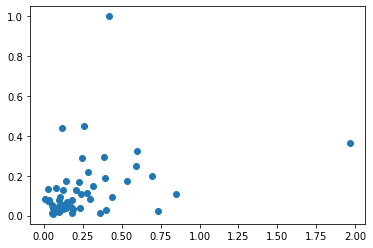

In [0]:
plt.scatter(annotate_data.norm_x, annotate_data.norm_y)
plt.show()

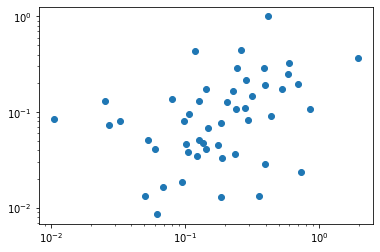

In [0]:
plt.scatter(annotate_data.norm_x, annotate_data.norm_y)
plt.yscale('log')
plt.xscale('log')
plt.show()

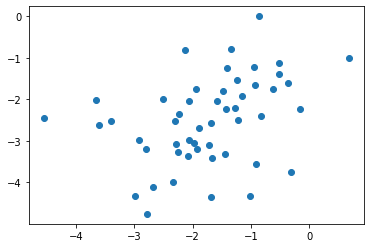

In [0]:
plt.scatter(np.log(annotate_data.norm_x), np.log(annotate_data.norm_y))
plt.show()

In [0]:
train_df=annotate_data[['norm_x', 'norm_y']]

In [0]:
train_df['log_norm_x']=np.log(annotate_data.norm_x)
train_df['log_norm_y']=np.log(annotate_data.norm_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
train_df.head()

,norm_x,norm_y,log_norm_x,log_norm_y
0,0.189441,0.033003,-1.663678,-3.411148
1,0.149606,0.068182,-1.899748,-2.685577
2,0.694737,0.198675,-0.364222,-1.616082
3,0.061966,0.008596,-2.781172,-4.756460
4,0.144628,0.040741,-1.933590,-3.200527


In [0]:
cluster =KMeans(n_clusters=5 ).fit(train_df[['norm_x', 'norm_y']])
centers=cluster.cluster_centers_
labels=cluster.labels_.astype(float)

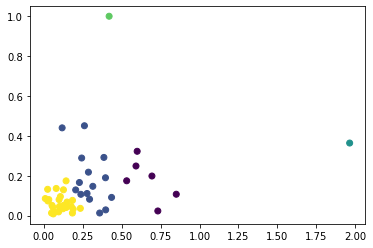

In [0]:
plt.scatter(annotate_data.norm_x, annotate_data.norm_y, c=labels)
plt.show()

In [0]:
cluster_log =KMeans(n_clusters=4 ).fit(train_df[['log_norm_x', 'log_norm_y']])
centers_log=cluster_log.cluster_centers_
labels_log=cluster_log.labels_.astype(float)

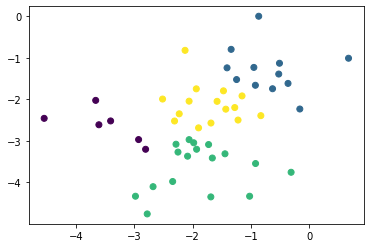

In [0]:
plt.scatter(train_df.log_norm_x, train_df.log_norm_y, c=labels_log)
plt.show()

In [0]:

inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(train_df[['log_norm_x', 'log_norm_y']]) 
    kmeanModel.fit((train_df[['log_norm_x', 'log_norm_y']]))     
      
  
    inertias.append(kmeanModel.inertia_) 
  
    #mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 #'euclidean'),axis=1)) / X.shape[0] 
    #mapping2[k] = kmeanModel.inertia_ 

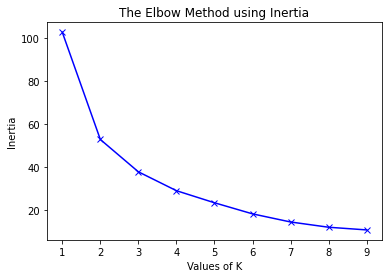

In [0]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

## From the above graph and clusters the good number will be 3 or 4